<a href="https://colab.research.google.com/github/parharti/DISCOVER-Cookbook/blob/main/Astronomy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv('Skyserver_SQL2_27_2018 6_51_39 PM.csv')

# Extract features and labels
X = data[['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol', 'field', 'specobjid', 'redshift', 'plate', 'mjd', 'fiberid']]
y = data['class']

# Encode labels (e.g., "QSO" as 0, "Star" as 1, etc.)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded = torch.tensor(y_encoded, dtype=torch.long)  # PyTorch expects labels as LongTensor

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the features (scaling between 0 and 1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

class ComplexModelWithLeakyReLU(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(ComplexModelWithLeakyReLU, self).__init__()
        # Adding more hidden layers with LeakyReLU activation
        self.layer1 = nn.Linear(input_dim, 128)
        self.layer2 = nn.Linear(128, 256)
        self.layer3 = nn.Linear(256, 512)
        self.layer4 = nn.Linear(512, 128)
        self.layer5 = nn.Linear(128, output_dim)
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.01)  # Using LeakyReLU
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.leaky_relu(self.layer1(x))
        x = self.dropout(x)
        x = self.leaky_relu(self.layer2(x))
        x = self.dropout(x)
        x = self.leaky_relu(self.layer3(x))
        x = self.dropout(x)
        x = self.leaky_relu(self.layer4(x))
        x = self.dropout(x)
        x = self.layer5(x)
        return x


# Model, Loss, and Optimizer
input_dim = X_train.shape[1]  # Number of features
output_dim = len(label_encoder.classes_)  # Number of classes (e.g., 1 for "QSO")

# Initialize the model
model = ComplexModelWithLeakyReLU(input_dim, output_dim)

# Cross entropy loss and Adam optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 100
batch_size = 32

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train)

    # Backward pass
    loss.backward()
    optimizer.step()

    if (epoch+1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluating the model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    y_pred = model(X_test_tensor)
    _, predicted = torch.max(y_pred, 1)  # Get the predicted class (index with max probability)

    # Calculate accuracy
    accuracy = (predicted == y_test).sum().item() / len(y_test)
    print(f'Accuracy: {accuracy * 100:.2f}%')

    # Calculate loss on the test set
    test_loss = criterion(y_pred, y_test)
    print(f'Test Loss: {test_loss.item():.4f}')


Epoch [2/100], Loss: 1.0424
Epoch [4/100], Loss: 0.9478
Epoch [6/100], Loss: 0.8740
Epoch [8/100], Loss: 0.8065
Epoch [10/100], Loss: 0.7195
Epoch [12/100], Loss: 0.6444
Epoch [14/100], Loss: 0.5964
Epoch [16/100], Loss: 0.5614
Epoch [18/100], Loss: 0.5385
Epoch [20/100], Loss: 0.5135
Epoch [22/100], Loss: 0.4925
Epoch [24/100], Loss: 0.4707
Epoch [26/100], Loss: 0.4542
Epoch [28/100], Loss: 0.4235
Epoch [30/100], Loss: 0.4202
Epoch [32/100], Loss: 0.4112
Epoch [34/100], Loss: 0.3892
Epoch [36/100], Loss: 0.3742
Epoch [38/100], Loss: 0.3553
Epoch [40/100], Loss: 0.3462
Epoch [42/100], Loss: 0.3409
Epoch [44/100], Loss: 0.3311
Epoch [46/100], Loss: 0.3215
Epoch [48/100], Loss: 0.3147
Epoch [50/100], Loss: 0.3041
Epoch [52/100], Loss: 0.3040
Epoch [54/100], Loss: 0.2965
Epoch [56/100], Loss: 0.2916
Epoch [58/100], Loss: 0.2931
Epoch [60/100], Loss: 0.2848
Epoch [62/100], Loss: 0.2836
Epoch [64/100], Loss: 0.2789
Epoch [66/100], Loss: 0.2722
Epoch [68/100], Loss: 0.2679
Epoch [70/100], Lo

Epoch [2/100], Loss: 1.0420, Accuracy: 54.25%
Epoch [4/100], Loss: 0.9377, Accuracy: 61.40%
Epoch [6/100], Loss: 0.8622, Accuracy: 68.70%
Epoch [8/100], Loss: 0.7787, Accuracy: 73.94%
Epoch [10/100], Loss: 0.6846, Accuracy: 77.45%
Epoch [12/100], Loss: 0.6276, Accuracy: 78.49%
Epoch [14/100], Loss: 0.5924, Accuracy: 79.61%
Epoch [16/100], Loss: 0.5544, Accuracy: 80.05%
Epoch [18/100], Loss: 0.5337, Accuracy: 80.58%
Epoch [20/100], Loss: 0.5099, Accuracy: 81.44%
Epoch [22/100], Loss: 0.4813, Accuracy: 81.73%
Epoch [24/100], Loss: 0.4667, Accuracy: 82.36%
Epoch [26/100], Loss: 0.4522, Accuracy: 83.34%
Epoch [28/100], Loss: 0.4394, Accuracy: 84.28%
Epoch [30/100], Loss: 0.4288, Accuracy: 85.39%
Epoch [32/100], Loss: 0.4167, Accuracy: 86.46%
Epoch [34/100], Loss: 0.4054, Accuracy: 87.14%
Epoch [36/100], Loss: 0.3917, Accuracy: 87.83%
Epoch [38/100], Loss: 0.3729, Accuracy: 88.56%
Epoch [40/100], Loss: 0.3591, Accuracy: 88.66%
Epoch [42/100], Loss: 0.3430, Accuracy: 89.09%
Epoch [44/100], L

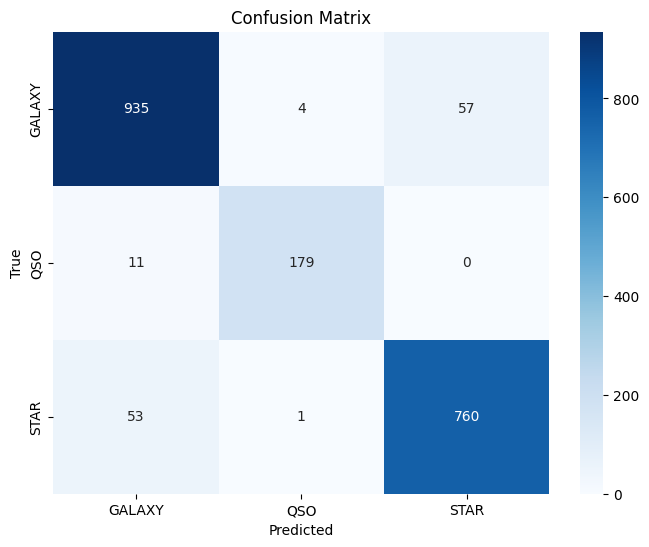

interactive(children=(Dropdown(description='plot_type', options=('accuracy', 'loss'), value='accuracy'), Outpu…

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

# Load dataset
data = pd.read_csv('Skyserver_SQL2_27_2018 6_51_39 PM.csv')

# Extract features and labels
X = data[['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol', 'field', 'specobjid', 'redshift', 'plate', 'mjd', 'fiberid']]
y = data['class']

# Encode labels (e.g., "QSO" as 0, "Star" as 1, etc.)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded = torch.tensor(y_encoded, dtype=torch.long)  # PyTorch expects labels as LongTensor

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the features (scaling between 0 and 1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

class ComplexModelWithLeakyReLU(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(ComplexModelWithLeakyReLU, self).__init__()
        # Adding more hidden layers with LeakyReLU activation
        self.layer1 = nn.Linear(input_dim, 128)
        self.layer2 = nn.Linear(128, 256)
        self.layer3 = nn.Linear(256, 512)
        self.layer4 = nn.Linear(512, 128)
        self.layer5 = nn.Linear(128, output_dim)
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.01)  # Using LeakyReLU
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.leaky_relu(self.layer1(x))
        x = self.dropout(x)
        x = self.leaky_relu(self.layer2(x))
        x = self.dropout(x)
        x = self.leaky_relu(self.layer3(x))
        x = self.dropout(x)
        x = self.leaky_relu(self.layer4(x))
        x = self.dropout(x)
        x = self.layer5(x)
        return x

# Model, Loss, and Optimizer
input_dim = X_train.shape[1]  # Number of features
output_dim = len(label_encoder.classes_)  # Number of classes (e.g., 1 for "QSO")

# Initialize the model
model = ComplexModelWithLeakyReLU(input_dim, output_dim)

# Cross entropy loss and Adam optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store accuracy and loss for each epoch
accuracy_list = []
loss_list = []

# Training the model
epochs = 100
batch_size = 32

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train)

    # Backward pass
    loss.backward()
    optimizer.step()

    # Calculate accuracy
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_train).sum().item() / len(y_train)

    accuracy_list.append(accuracy)
    loss_list.append(loss.item())

    if (epoch+1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy * 100:.2f}%')

# Evaluating the model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    y_pred = model(X_test_tensor)
    _, predicted = torch.max(y_pred, 1)  # Get the predicted class (index with max probability)

    # Calculate accuracy
    accuracy = (predicted == y_test).sum().item() / len(y_test)
    print(f'Accuracy: {accuracy * 100:.2f}%')

    # Calculate loss on the test set
    test_loss = criterion(y_pred, y_test)
    print(f'Test Loss: {test_loss.item():.4f}')

    # Confusion Matrix
    cm = confusion_matrix(y_test, predicted)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Plot Accuracy and Loss (Interactive)
    @interact
    def plot_results(plot_type=['accuracy', 'loss']):
        if plot_type == 'accuracy':
            plt.figure(figsize=(8, 6))
            plt.plot(np.arange(epochs), accuracy_list)
            plt.title('Accuracy Over Epochs')
            plt.xlabel('Epochs')
            plt.ylabel('Accuracy')
            plt.show()

        elif plot_type == 'loss':
            plt.figure(figsize=(8, 6))
            plt.plot(np.arange(epochs), loss_list)
            plt.title('Loss Over Epochs')
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.show()


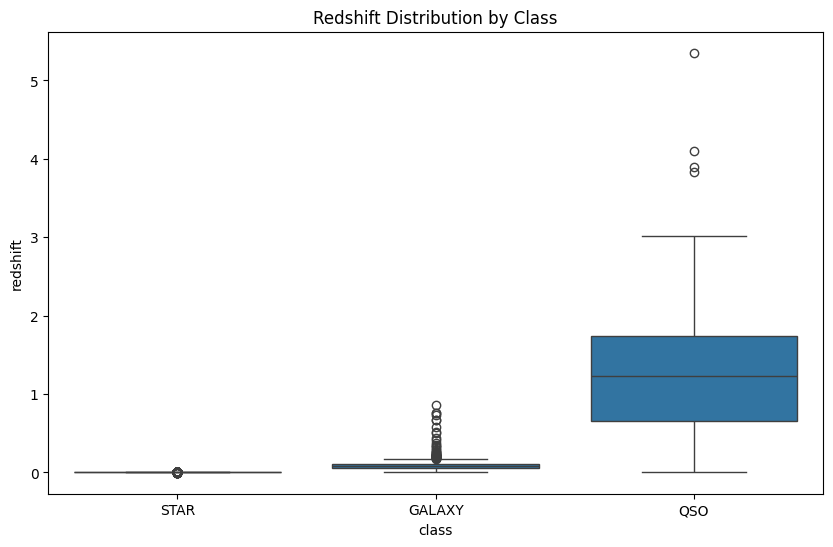

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='redshift', data=data)
plt.title("Redshift Distribution by Class")
plt.show()
